In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

Text(0.5, 1.0, 'Info')

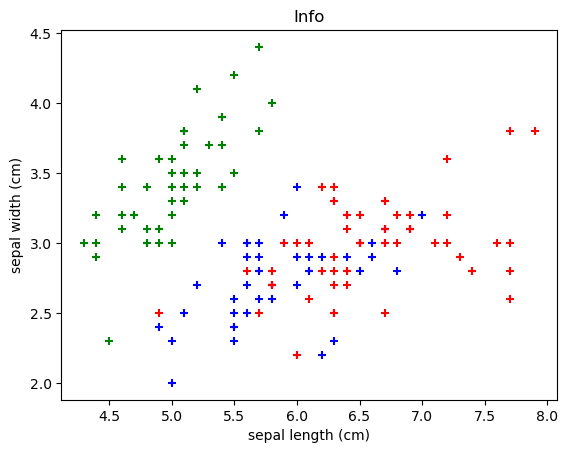

In [11]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color ='g', marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color ='b', marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color ='r', marker='+')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Info')

Text(0.5, 1.0, 'Info')

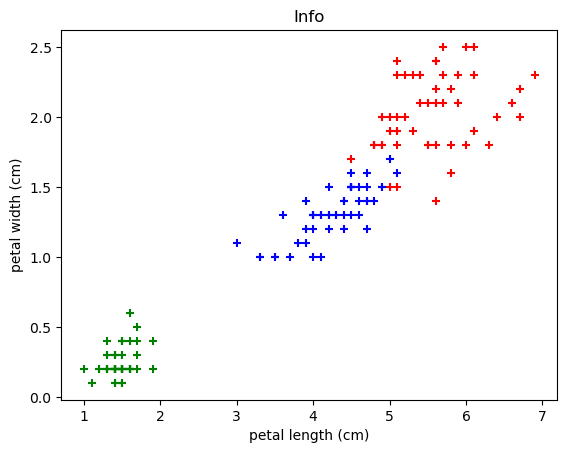

In [12]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color ='g', marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color ='b', marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color ='r', marker='+')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Info')

In [13]:
from sklearn.model_selection import train_test_split
x = df.drop(['target','flower_name'],axis=1)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [16]:
from sklearn import svm
from sklearn.svm import SVC
model = SVC()

In [17]:
model.fit(x_train,y_train)

SVC()

In [18]:
model.score(x_test,y_test)

1.0

In [19]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm.SVC(gamma = 'auto'),{'C' : [1,10,20],
                                           'kernel':['rbf','Linear']}
                  ,cv = 5, return_train_score = False)

clf.fit(x_train,y_train)
clf.cv_results_

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklea

{'mean_fit_time': array([0.00437856, 0.00079985, 0.00350699, 0.00329041, 0.00343566,
        0.        ]),
 'std_fit_time': array([0.00157382, 0.00074793, 0.00386144, 0.00658083, 0.00687132,
        0.        ]),
 'mean_score_time': array([0.00758824, 0.        , 0.00564294, 0.        , 0.00647221,
        0.        ]),
 'std_score_time': array([0.00432781, 0.        , 0.00556222, 0.        , 0.00802443,
        0.        ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'Linear', 'rbf', 'Linear', 'rbf', 'Linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'Linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'Linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'Linear'}],


In [20]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004379,0.001574,0.007588,0.004328,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.0,0.916667,1.000000,0.958333,0.958333,0.966667,0.031180,2
1,0.000800,0.000748,0.000000,0.000000,1,Linear,"{'C': 1, 'kernel': 'Linear'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,0.003507,0.003861,0.005643,0.005562,10,rbf,"{'C': 10, 'kernel': 'rbf'}",1.0,0.916667,0.958333,0.958333,1.000000,0.966667,0.031180,1
3,0.003290,0.006581,0.000000,0.000000,10,Linear,"{'C': 10, 'kernel': 'Linear'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,0.003436,0.006871,0.006472,0.008024,20,rbf,"{'C': 20, 'kernel': 'rbf'}",1.0,0.916667,0.916667,1.000000,1.000000,0.966667,0.040825,2
5,0.000000,0.000000,0.000000,0.000000,20,Linear,"{'C': 20, 'kernel': 'Linear'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [21]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.966667
1,1,Linear,NaN
2,10,rbf,0.966667
3,10,Linear,NaN
4,20,rbf,0.966667
5,20,Linear,NaN


In [22]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run

In [23]:
clf.best_score_

0.9666666666666668

In [24]:
clf.best_score_

0.9666666666666668

In [29]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma = 'auto'),{'C' : [1,10,20],
                                           'kernel':['rbf','Linear']},
                  cv = 5, 
                  return_train_score = False,
                  n_iter = 2)

In [30]:
rs.fit(x_train,y_train)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn

,param_C,param_kernel,mean_test_score
0,10,Linear,NaN
1,1,rbf,0.966667


In [31]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [32]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.966667,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,0.958333,{'n_estimators': 5}
2,logistic_regression,0.950000,{'C': 5}
